Com not available between 30/04/2019 21/10/2019. they inroduced robot check.

In [11]:
from bs4 import BeautifulSoup as beauty
import pandas as pd
import numpy as np
import os
import re
import datetime as dt

In [19]:
list_Vker_Hu =[i for i in os.listdir() if 'HU_Vker' in i if 'ingatlanokHU_Vker' in i]
list_Vker_Com = [i for i in os.listdir() if 'COM_Vker' in i if 'ingatlanCOM_Vker' in i]
list_Vker_Cen = [i for i in os.listdir() if 'rum_Vker' in i if 'otthoncentrum_Vker' in i]

In [20]:
print('No of files taken from .hu:', len(list_Vker_Hu))
print('No of files taken from .com:', len(list_Vker_Com))
print('No of files taken from \'centrum\':', len(list_Vker_Cen))

No of files taken from .hu: 1
No of files taken from .com: 53
No of files taken from 'centrum': 1


In [40]:
HU = pd.DataFrame(columns =['id','sqm','room','price','description','agency','url','date', 'source'])
for i in list_Vker_Hu:
    html = open(i, 'r').read()
    l = beauty(html, 'lxml')
    for ii in range(len(l.find_all('div', attrs={'class': 'result-row'}))):
        value = []
        # ID
        value.append(l.find_all('div', attrs={'class': 'result-row'})[ii].find_all('a')[1]['href'].split('/')[-1])
        #sqm
        sqm = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class':'column-first'})
        if len(sqm) > 0:
            value.append(sqm[0].text.strip().replace('\n', ' ').split(' ')[1])
        else: value.append(np.NAN)
        #rooms
        room = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class':'column'})
        if len(room) > 0:
            value.append(room[0].text.strip().replace('\n', ' ').split(' ')[1])
        else: value.append(np.NAN)
        '''
        # type: not informative
        types = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class':'column'})
        if len(types) > 1:
            value.append(types[1].text.strip().replace('\n', ' ').split(' ')[2])
        else: value.append(np.NAN)
        '''
        # price
        p = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class':'result-price left'})
        if len(p) > 0:
            value.append(p[0].text.strip().replace('.', '').split(' ')[0])
        else: value.append(np.NAN)
        #description
        d = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class': 'result-short-description'})
        if len(d) > 0:
            value.append(d[0].text.strip())
        else: value.append(np.NAN)
        #agency
        age = l.find_all('div', attrs={'class': 'result-row'})[ii].find_all(attrs={'class':'office-logo-container right'})
        if len(age) > 0:
            value.append(age[0].find('a')['title'])
        else: value.append(np.NAN)
        #url
        value.append(l.find_all('div', attrs={'class': 'result-row'})[ii].find_all('a')[1]['href'])         
        #date     
        value.append(dt.datetime.date(dt.datetime.strptime(re.sub(r'\D', '', i), '%d%m%Y')))
        #source
        value.append('hu')
        HU.loc[len(HU), :] =  value

In [41]:
HU.shape

(26, 9)

In [42]:
#HU.to_csv('Hu_Vker'+str(dt.datetime.now().date())+'.csv', index=False, index_label= None)

In [43]:
Cen = pd.DataFrame(columns = ['id','sqm','room','price','description','agency','url','region','date', 'source'])
for i in list_Vker_Cen:
    html = open(i,'r').read()
    l = beauty(html, 'lxml')
    for ii in l.find_all('div', attrs={'class': 'estate-list-box'}):
        value = []
        # ID
        value.append(ii.find_all(attrs ={'class':'oc-icon icon-oc-oc-kedvenc estate-bookmark pls-login atRealEstateList-estateBookmark estate-add-localStorage'})[0]['data-estate-id'])
        #sqm
        sqm = ii.find_all(attrs={'class':'estate-size col-xs-6 text-right'})
        if len(sqm) > 0:
            value.append(sqm[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)
        #rooms
        room = ii.find_all(attrs={'class':'atEstateListItem-Rooms'})
        if len(room) > 0:
            value.append(room[0].text.strip())
        else: value.append(np.NAN)
        '''# type: not informative
        types = ii.find_all(attrs={'class':'estate-type-size'})
        if len(types) > 0:
            value.append(types[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)'''
        # price
        p = ii.find_all(attrs={'class':'estate-price atEstateListItem-Price col-xs-6'})
        if len(p) > 0:
            value.append(p[0].text.strip().replace(',', '.').split(' ')[0])
        else: value.append(np.NAN)
        #description
        d = ii.find_all(attrs={'class': 'inner-hide-description'})
        if len(d) > 0:
            value.append(d[0].text.strip())
        else: value.append(np.NAN)
        #agency
        age = ii.find_all(attrs={'class':'office-logo-container right'})
        if len(age) > 0:
            value.append(age[0].find('a')['title'])
        else: value.append(np.NAN)
        #url
        value.append('https://www.oc.hu'+ii.find_all('a')[0]['href'])  
        #region
        value.append(ii.find_all(attrs ={'class':'oc-icon icon-oc-oc-kedvenc estate-bookmark pls-login atRealEstateList-estateBookmark estate-add-localStorage'})[0]['data-estate-regno'])
        #date     
        value.append(dt.datetime.date(dt.datetime.strptime(re.sub(r'\D', '', i), '%d%m%Y')))
        #source
        value.append('centrum')       
        Cen.loc[len(Cen), :] =  value

In [44]:
Cen.shape

(7, 10)

In [45]:
#Cen.to_csv('Cen_Vker'+str(dt.datetime.now().date())+'.csv', index=False, index_label=None)

In [23]:
Com = pd.DataFrame(columns = ['id','sqm','room','price','price_sqm','description','agency','url','region','date', 'source'])
for i in list_Vker_Com:
    html = open(i,'r').read()
    # two different class identifier for the ads
    l = beauty(html,'lxml').find_all('div', attrs = {'class': 'listing js-listing listing--cluster-parent js-cluster-parent'})
    l = l + (beauty(html,'lxml').find_all('div', attrs = {'class': 'listing js-listing'}))
    for ii in l:
        value = []
        # ID
        value.append(ii['data-id'])
        #sqm
        sqm = ii.find_all(attrs={'class':'listing__parameter listing__data--area-size'})
        if len(sqm) > 0:
            value.append(sqm[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)
        #rooms
        room = ii.find_all(attrs={'class':'listing__parameter listing__data--room-count'})
        if len(room) > 0:
            value.append(room[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)
        '''## type not informative
        types = ii.find_all(attrs={'class':'estate-type-size'})
        if len(types) > 0:
            value.append(types[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)'''
        # price
        p = ii.find_all(attrs={'class':'price'})
        if len(p) > 0:
            value.append(p[0].text.strip().split(' ')[0])
        else: value.append(np.NAN)
        # price_sqm
        ps = ii.find_all(attrs={'class':'price--sqm'})
        if len(ps) > 0:
            value.append(re.sub(r'\D','',ps[0].text)[:-1])
        else: value.append(np.NAN)
        ##description
        d = ii.find_all(attrs={'class': 'inner-hide-description'})
        if len(d) > 0:
            value.append(d[0].text.strip())
        else: value.append(np.NAN)
        #agency
        age = ii.find_all(attrs={'class':'listing__thumbnail is-empty js-listing-active-area'})
        if len(age) > 0:
            value.append(age[0]['data-is-own'])
        else: value.append(np.NAN)
        #url
        value.append('https://ingatlan.com'+ii.find('a')['href'])  
        #region
        r = ii.find_all(attrs={'class':'listing__address'})
        if len(r) > 0:
            value.append(r[0].text.strip())
        else: value.append(np.NAN)
        #date     
        value.append(dt.datetime.date(dt.datetime.strptime(re.sub(r'\D', '', i), '%d%m%Y')))
        #source
        value.append('com')       
        Com.loc[len(Com), :] =  value

In [24]:
Com.shape

(1533, 11)

In [25]:
#Com.to_csv('Com_Vker'+str(dt.datetime.now().date())+'.csv', index=False, index_label =None)

Exploring and validation codes

In [14]:
#show original html code for data mining
print(l[0].prettify())

<div class="listing js-listing listing--cluster-parent js-cluster-parent" data-cluster-id="c_5667650" data-id="30477505">
 <div class="listing__card">
  <a class="listing__thumbnail is-empty js-listing-active-area" data-is-own="Saját hirdetés" href="/v-ker/elado+lakas/tegla-epitesu-lakas/budapest+5+kerulet/30477505" target="_blank" title="Részletek">
   <div class="listing__already-seen">
    <div class="listing__already-seen-text">
     Megnéztem
    </div>
   </div>
   <div class="listing__labels">
   </div>
   <div class="listing__thumbnail-image no-photo" title="Nincs kép">
   </div>
  </a>
  <div class="listing__hidden-overlay">
   <div class="listing__hidden-text">
    Elrejtetted ezt az ingatlant és az összes hozzá tartozó hirdetést. Legközelebb nem fog megjelenni a találati listában.
   </div>
   <button class="listing__hide-undo button--link js-hide-undo" data-id="30477505">
    <svg aria-hidden="true" class="listing__action-icon--check">
     <use xlink:href="#material-done">

Number of ads by time at sources

In [28]:
counts = {'hu': [], 'cen':[],'com':[],'hudate': [],'cendate': [], 'comdate': []}

In [29]:
#manual change for df
d = []
c = []
for m,n in sorted(zip(Com['date'].value_counts().index, Com['date'].value_counts().values)):
    d.append(m);c.append(n)

In [33]:
#manual change of keys
counts['comdate'] = d
counts['com'] = c

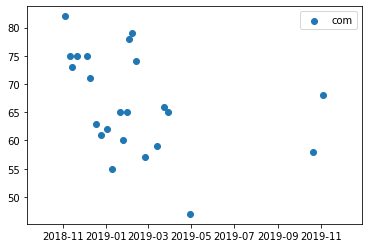

In [34]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#plt.scatter(counts['hudate'],counts['hu'], label = 'hu')
#plt.scatter(counts['cendate'],counts['cen'], label = 'cen')
plt.scatter(counts['comdate'],counts['com'], label = 'com')
plt.legend()
plt.show()